# Цель задания
Применить средства автоматизации тестирования python для автоматического тестирования качества работы модели машинного обучения на различных датасетах.

# Содержание задания
- Создать три датасета с «качественными данными», на которых можно обучить простую модель линейной регрессии.

- На одном из этих датасетов обучить модель линейной регрессии.

- Создать датасет с шумом в данных.

- Провести тестирование работы модели на разных датасетах с использованием Pytest, анализируя качество предсказания, обнаружить проблему на датасете с шумами.

### Создадим наборы данных согласно условию задания

In [86]:
import numpy as np

import matplotlib.pyplot as plt

# Создаем три датасета с качественными данными 
num_samples = 500
X1 = np.random.rand(num_samples)  
y1 = 4 * X1  + 10 + np.random.randn(num_samples) * 0.4  

X2 = np.random.rand(num_samples)  
y2 = 4 * X2 + 10 + np.random.randn(num_samples) * 0.4  

X3 = np.random.rand(num_samples)  
y3 = 4 * X3 + 10 + np.random.randn(num_samples) * 0.4  


# Создаем датасет с выбросами данных
X_noize = np.linspace(0, 1, num_samples)
y_noize = 4 * X_noize + 10 + np.random.randn(num_samples) * 0.4

y_noize[50:250] += 1



### Выведем график с ошибочными данными

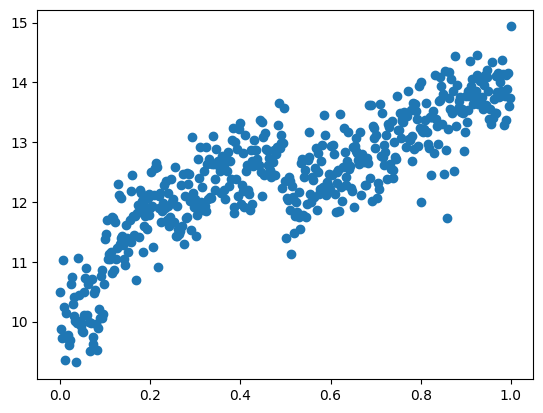

In [87]:
plt.scatter(X_noize, y_noize)
plt.show()

### Вывод графика для тренировочных данных

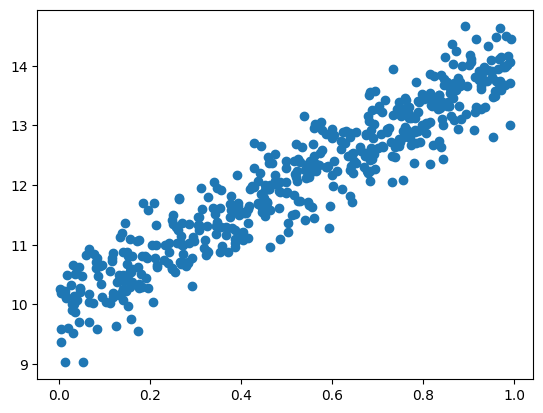

In [88]:
plt.scatter(X1, y1)

### Создание и обучение модели линейной регресии

In [89]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Создадим модель линейной регрессии
lnr = LinearRegression()

# преобразуем датафрейм для обучения модели
X1 = np.reshape(X1, (-1, 1))

# обучаем модель на тренировочном датасете
lnr.fit(X1, y1)

lnr.score(X1, y1)


0.89438416389518

In [90]:
y2_predict = lnr.predict(X2.reshape(-1, 1))

r2_score(y2, y2_predict)

0.8954395587443658

In [96]:
y3_predict = lnr.predict(X3.reshape(-1, 1))

r2_score(y3, y3_predict)

0.882964061015051

In [97]:

y_noize_predict = lnr.predict(X_noize.reshape(-1, 1))

r2_score(y_noize, y_noize_predict)

0.5063890101306874

### Тестирование модели

In [ ]:
# Установка необходимых библиотек
!pip install pytest ipytest

In [98]:
# Импорт необходимых библиотек
import ipytest
ipytest.autoconfig()

In [99]:
# Создаем необходимые тесты
def test_1():
    assert lnr.score(X1, y1) > 0.8
    
def test_2():
    assert r2_score(y2, y2_predict) > 0.8
    
def test_3():
    assert r2_score(y3, y3_predict) > 0.8
    
def test_4():
    assert r2_score(y_noize, y_noize_predict) > 0.8

In [100]:
# Запускаем тесты
ipytest.run('-vv')

======================================= test session starts =======================================
platform win32 -- Python 3.12.3, pytest-8.2.0, pluggy-1.5.0 -- c:\Users\Santerr80\OneDrive\Документы\GitHub\myenv\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\Santerr80\OneDrive\Документы\GitHub\mlops_practice\lab5
plugins: hydra-core-1.3.2
collecting ... collected 4 items

t_ee65734d3eeb4385b3ccbbd75207e383.py::test_1 PASSED                                         [ 25%]
t_ee65734d3eeb4385b3ccbbd75207e383.py::test_2 PASSED                                         [ 50%]
t_ee65734d3eeb4385b3ccbbd75207e383.py::test_3 PASSED                                         [ 75%]
t_ee65734d3eeb4385b3ccbbd75207e383.py::test_4 FAILED                                         [100%]

============================================ FAILURES =============================================
_____________________________________________ test_4 ______________________________________________

    def

<ExitCode.TESTS_FAILED: 1>

### Выводы: 
Как и ожидалось ошибочные данные не прошли тесты.